In [7]:
import numpy as np
import pandas as pd
df = pd.read_csv("ENJOYSPORT.csv")
df
h = ['0' for i in range(len(df.columns)-1)]

for index, row in df.iterrows():
    if row['EnjoySport'] == 1:
        for i in range(len(h)):
            if h[i] == '0':
                h[i] = row[i]
            elif h[i] != row[i]:
                h[i] = '?'
    print(h)

['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [10]:
#candidate algorithm
import pandas as pd
import numpy as np
df=pd.read_csv("ENJOYSPORT.csv")
col = list(df.columns)
s = [0 for i in range(len(col)-1)] 
g = [['?' for i in range(len(col)-1)] for j in range(len(col)-1)]
# print(s,g)

for ind, row in df.iterrows():
    for i in range(len(s)):
        if row['EnjoySport'] == 1:
            if s[i] == 0:
                s[i] = row[i]
            if s[i] != row[i]:
                s[i] = '?'
                g[i][i] = '?'
        else:
            if s[i] != row[i]:
                g[i][i] = s[i]
            else:
                g[i][i] = '?'
gen = ["?" for i in range(len(s))]
while(1):
    if gen in g: g.remove(gen)
    else: break

vs  = []
for each in g:
    for i in range(len(s)):
        if each[i] == '?' and s[i] != '?':
            dup = each[:]
            dup[i] = s[i]
            if dup not in vs:
                vs.append(dup)
vs.extend(g)
vs.extend(s)
# print(s,g) 
print(vs)

[['Sunny', 'Warm', '?', '?', '?', '?'], ['Sunny', '?', '?', 'Strong', '?', '?'], ['?', 'Warm', '?', 'Strong', '?', '?'], ['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], 'Sunny', 'Warm', '?', 'Strong', '?', '?']


In [124]:
# naive bais
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
df=pd.read_csv('play_tennis (1).csv')

x_train = df[:10]
x_test = df[10:]
yes1 = x_train.loc[x_train['play'] == 'Yes'].index.to_list()
yes = len(yes1)

no1 = x_train.loc[x_train['play'] == 'No'].index.to_list()
no = len(no1)
z1 = x_train.index.to_list()
z=len(z1)

cls = df.columns[1:]

d = {}
for i in cls:
    temp = {}
    param = set(df[:][i])
    for j in param:
        ycount = 0
        ncount = 0
        for ind in range(10):
            if j == df.loc[ind, i]:
                if ind in yes1:
                    ycount += 1
                if ind in no1:
                    ncount += 1
        temp[j] = [ycount/10, ncount/10]
    d[i] = temp
print(d)
pyes = yes/z
pno = no/z
res = []

cols = df.columns[1:-1]
for row in x_test.index:
    for col in cols:
        node = df.loc[row, col]
        pyes *= d[col][node][0]
        pno *= d[col][node][1]
    if(pyes > pno):
        res.append('Yes')
    else:
        res.append('No')
# print(res,x_test['play'])

print("accuracy:",accuracy_score(x_test['play'], res))
        
        


{'outlook': {'Overcast': [0.2, 0.0], 'Rain': [0.3, 0.1], 'Sunny': [0.1, 0.3]}, 'temp': {'Mild': [0.2, 0.1], 'Cool': [0.3, 0.1], 'Hot': [0.1, 0.2]}, 'humidity': {'High': [0.2, 0.3], 'Normal': [0.4, 0.1]}, 'wind': {'Strong': [0.1, 0.2], 'Weak': [0.5, 0.2]}, 'play': {'Yes': [0.6, 0.0], 'No': [0.0, 0.4]}}
accuracy: 0.75


In [139]:
# text classification
import pandas as pd
df = pd.read_csv('text_classification (1).csv', names = ['review', 'classification'])
train = df[:10]
test = df[10:]
n = 10

pos = (train['classification'] == 'pos').sum()
neg = (train['classification'] == 'neg').sum()
p_pos = pos/n
p_neg = neg/n
print(p_pos, p_neg)

def remove_dup(l):
    no_dup = []
    for i in l:
        if i not in no_dup:
            no_dup.append(i)
    return no_dup

s = []
for i in train['review']:
    s.extend(i.split())
voc = remove_dup(s)
n_voc = len(voc)
print("voc: ",voc)

v_pos = []
v_neg = []
for i in range(len(train['classification'])):
    if train['classification'][i] == 'pos':
        v_pos.extend(train['review'][i].split())
    if train['classification'][i] == 'neg':
        v_neg.extend(train['review'][i].split())
        
n_pos = len(v_pos)
n_neg = len(v_neg)
# print(n_pos, n_neg)

res = []
pos_prod = p_pos
neg_prod = p_neg
for i in test['review']:
    for word in i.split():
        pos_prod *= (v_pos.count(word) + 1)/(n_pos +n_voc)
        neg_prod *= (v_neg.count(word) + 1)/(n_neg +n_voc)
    if(pos_prod > neg_prod):
        res.append('pos')
    else:
        res.append('neg')
# print(res)

tp,tn,fp,fn = 0,0,0,0
j = 0
for i in test['classification']:
    if res[j] == i and i == 'pos':
        tp += 1
    elif res[j] == i and i == 'neg':
        tn += 1
    elif res[j] != i and i == 'pos':
        fn += 1
    else:
        fp += 1
    j += 1
# print(tp,tn,fp,fn)
print("accuracy: ",(tp+tn)/(tp+tn+fp+fn))
print("precision : ", tp/(tp+fp))
print("recall : ", tp/(tp+fn))


0.5 0.5
voc:  ['I', 'love', 'this', 'sandwich', 'is', 'an', 'amazing', 'place', 'feel', 'very', 'good', 'about', 'these', 'beers', 'my', 'best', 'work', 'what', 'awesome', 'view', 'do', 'not', 'like', 'restaurant', 'am', 'tired', 'of', 'stuff', "can't", 'deal', 'with', 'he', 'sworn', 'enemy', 'boss', 'horrible']
accuracy:  0.625
precision :  0.5714285714285714
recall :  1.0


In [34]:
import pandas as pd
import math
data = pd.read_csv("play_tennis (1).csv")
del data['day']

print(data)

def entropy(d):
    yes = len(d[d['play'] == 'Yes'])
    no = len(d[d['play'] == 'No'])
    yes /= yes + no
    no /= yes + no
    if yes == 0:
        return -round(no*math.log2(no), 2)
    if no == 0:
        return -round(yes*math.log2(yes), 2)
    return -round(no*math.log2(no) + yes*math.log2(yes), 2)

def selectRoot(d):
    cols = data.columns[:-1]
#     print(cols)
    maxIg = 0
    ent = entropy(d)
#     print(ent)
    n = len(d)
    root = ''
    for col in cols:
        entAll = 0
#         print(d[col].unique())
        for val in d[col].unique():
            entAll += len(d[d[col] == val])/n*entropy(d[d[col] == val])
#         print(entAll)
        if ent - entAll > maxIg:
            maxIg = ent - entAll
            root = col
            
    return root
 
tree = {}
root = selectRoot(data)
print(root)
current_root = [root, data.index]
tree[root] = []
open_list = [current_root]
while open_list != []:
    cur = open_list.pop()
    for val in data[cur[0]].unique():
        d = data.iloc[cur[1]]
        tree[cur[0]].append(val)
        yes = len(d[(d[cur[0]] == val) & (d['play'] == 'Yes')])
        no = len(d[(d[cur[0]] == val) & (d['play'] == 'No')])
        if yes == 0:
            tree[val] = 'No'
        elif no == 0:
            tree[val] = 'Yes'
        else:
            d = d[d[cur[0]] == val]
            root = selectRoot(d)
            tree[val] = [root]
            tree[root] = []
            open_list.append([root, d.index])
for i in tree:
    print(i,":",tree[i])

     outlook  temp humidity    wind play
0      Sunny   Hot     High    Weak   No
1      Sunny   Hot     High  Strong   No
2   Overcast   Hot     High    Weak  Yes
3       Rain  Mild     High    Weak  Yes
4       Rain  Cool   Normal    Weak  Yes
5       Rain  Cool   Normal  Strong   No
6   Overcast  Cool   Normal  Strong  Yes
7      Sunny  Mild     High    Weak   No
8      Sunny  Cool   Normal    Weak  Yes
9       Rain  Mild   Normal    Weak  Yes
10     Sunny  Mild   Normal  Strong  Yes
11  Overcast  Mild     High  Strong  Yes
12  Overcast   Hot   Normal    Weak  Yes
13      Rain  Mild     High  Strong   No
outlook
outlook : ['Sunny', 'Overcast', 'Rain']
Sunny : ['humidity']
humidity : ['High', 'Normal']
Overcast : Yes
Rain : ['wind']
wind : ['Weak', 'Strong']
Weak : Yes
Strong : No
High : No
Normal : Yes


In [109]:
# back propagation
import numpy as np

x = np.array(([1, 9],[1,5], [3,6]), dtype = float)
y = np.array(([92],[86],[89]), dtype = float)
x = x/np.amax(x, axis =0)
y /= 100

# to compute output 
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# to compute half errors
def derivative_sigmoid(x):
    return x*(1-x)

epoch = 5
lr = 0.1

ip_neurons = 2
hd_neurons = 1
op_neurons = 1

wh = np.random.uniform(size = (ip_neurons, hd_neurons))
bh = np.random.uniform(size = (1, hd_neurons))
wout = np.random.uniform(size = (hd_neurons, op_neurons))
bout = np.random.uniform(size = (1, op_neurons))

for i in range(epoch):
#     forward propagation
    hin = np.dot(x, wh)
    hin += bh
    hout = sigmoid(hin)
    
    oin = np.dot(hout, wout)
    oin += bout
    oout = sigmoid(oin)
#     backward propagation
    EO = derivative_sigmoid(oout)*(y - oout)
    EH = derivative_sigmoid(oout)*np.dot(EO, wout.T)*hout
    
    wout += np.dot(hout.T, EO)*lr
    wh += np.dot(x.T, EH)*lr
    
    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(x))
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,oout)
    print ("-----------Epoch-", i+1, "Ends----------\n")
    
print("Input: \n" + str(x))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,oout)


-----------Epoch- 1 Starts----------
Input: 
[[0.33333333 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.54996267]
 [0.54647191]
 [0.55024659]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.33333333 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.5529636]
 [0.5491826]
 [0.553272 ]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.33333333 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.5559346 ]
 [0.55186638]
 [0.55626743]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.33333333 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.55887586]
 [0.55452341]
 [0.559233

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


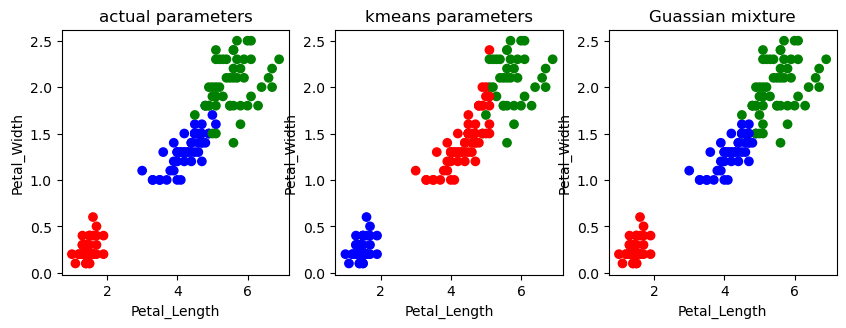

In [99]:
# EM algorithm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
color = np.array(["red", "blue","green"])



plt.figure(figsize = (10, 7))
plt.subplot(2, 3, 1)
plt.title("actual parameters")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
plt.scatter(x.Petal_Length, x.Petal_Width, c= color[y.Targets])


plt.subplot(2, 3, 2)
model=KMeans(n_clusters=3).fit(x)
plt.scatter(x.Petal_Length, x.Petal_Width, c= color[model.labels_])
plt.title("kmeans parameters")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")

plt.subplot(2, 3, 3)
gmm = GaussianMixture(n_components = 3).fit(x).predict(x)
plt.scatter(x.Petal_Length, x.Petal_Width, c= color[gmm])
plt.title("Guassian mixture")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')
plt.show()


In [63]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

iris = datasets.load_iris()
iris
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.1)
classifier = KNeighborsClassifier(7)
for i in range(len(iris.target_names)):
    print("label",i+1, iris.target_names[i])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
for i in range(len(y_pred)):
    print("sample:",x_test[i],"  actual value : ",y_test[i],"  predicted : ", y_pred[i])
    print("accuracy: ",classifier.score(x_test, y_test))
print("confusion:\n", confusion_matrix(y_test, y_pred))
print("accuracy:\n", classification_report(y_test, y_pred))

label 1 setosa
label 2 versicolor
label 3 virginica
sample: [6.3 2.5 5.  1.9]   actual value :  2   predicted :  2
accuracy:  1.0
sample: [7.  3.2 4.7 1.4]   actual value :  1   predicted :  1
accuracy:  1.0
sample: [5.7 2.6 3.5 1. ]   actual value :  1   predicted :  1
accuracy:  1.0
sample: [7.7 2.8 6.7 2. ]   actual value :  2   predicted :  2
accuracy:  1.0
sample: [5.8 2.7 3.9 1.2]   actual value :  1   predicted :  1
accuracy:  1.0
sample: [5.9 3.  5.1 1.8]   actual value :  2   predicted :  2
accuracy:  1.0
sample: [7.2 3.  5.8 1.6]   actual value :  2   predicted :  2
accuracy:  1.0
sample: [6.6 2.9 4.6 1.3]   actual value :  1   predicted :  1
accuracy:  1.0
sample: [5.5 3.5 1.3 0.2]   actual value :  0   predicted :  0
accuracy:  1.0
sample: [5.2 3.4 1.4 0.2]   actual value :  0   predicted :  0
accuracy:  1.0
sample: [5.9 3.  4.2 1.5]   actual value :  1   predicted :  1
accuracy:  1.0
sample: [5.5 4.2 1.4 0.2]   actual value :  0   predicted :  0
accuracy:  1.0
sample: [5.1

C:\Users\jayac\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\jayac\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


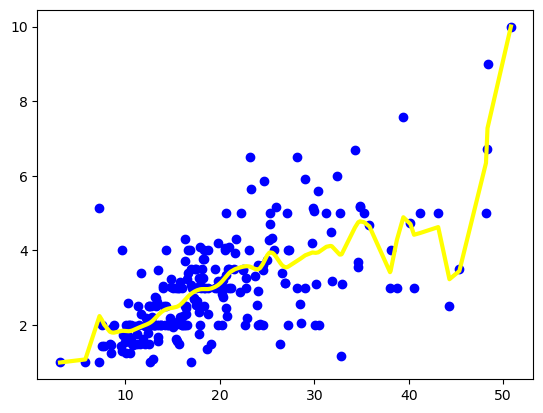

In [47]:
# Locally weighted regression
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("10-dataset.csv")
print(df)

cola = np.array(df.total_bill)
colb = np.array(df.tip)
bill = np.mat(cola)
tip = np.mat(colb)
m = np.shape(bill)[1]
ones = np.ones((m, 1))
# print(ones, bill, m)
x = np.hstack((ones, bill.T))

def kernal(point, x, k):
    m = np.shape(x)[0]
    wt = np.eye(m)
    for i in range(m):
        diff = point - x[i]
        wt[i, i] = np.exp(diff*diff.T/(-2*k*k))
    
    return wt
def weights(point, x, y, k):
    wt = kernal(point, x, k)
    w = (x.T*(wt*x)).I*(x.T*(wt*y.T))
    return w

def localWeights(x, y, k):
    m = np.shape(x)[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] += x[i]*weights(x[i], x, y, k)
    return y_pred
# print(x)
y_pred = localWeights(x, tip, 0.8)
        
xsort = x.copy()
xsort.sort(axis = 0)
plt.scatter(cola, colb, color = "blue")
plt.plot(xsort[:,1], y_pred[x[:,1].argsort(axis = 0)], color ="yellow", linewidth = "3")
plt.show()
